In [37]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

In [38]:
# [edge, 1pod_mec, 2pod_mec, 3pod_mec, 4pod_mec, 5pod_mec]
# mean
mean_time_null_to_cold = []  #khởi tạo là null to warm disk nhưng hiện tại đang import data của null to cold, sau nhớ sửa
mean_time_warm_disk_to_warm_cpu = []
mean_time_warm_cpu_to_active = []
# std
std_time_null_to_cold = []
std_time_null_to_warm_disk = []
std_time_warm_disk_to_warm_cpu = []
std_time_warm_cpu_to_active = []

# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval


In [39]:
average_time_null_to_cold = [] 
average_time_warm_disk_to_warm_cpu_process = []


for j in range(1, 11):
    file_name = "../../Measurements/Lifecycle/4G/timestamp/jetson/time_arm_pod_1_rep_"+str(j)+"_18_7_2023_12h45.csv"
    #PROCESS
    time_null_to_cold = []
    time_warm_disk_to_warm_cpu_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == "null_to_cold_process":
                time_null_to_cold.append(float(row[1]))
            if row[2] == "warm_disk_to_warm_CPU_process":
                time_warm_disk_to_warm_cpu_process.append(float(row[1]))

        average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
        average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
std_time_null_to_cold.append(np.std(average_time_null_to_cold)/np.sqrt(len(average_time_null_to_cold)))
mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))


average_time_null_to_cold = [] 
average_time_warm_disk_to_warm_cpu_process = []

for i in range(1,2):
    average_time = [] 
    for j in range(1, 11):
        file_name_list = glob.glob("../../Measurements/Lifecycle/4G/timestamp/mec/time_x86_pod_"+str(i)+"_rep_"+str(j)+"_*")
        for file_name in file_name_list:
            time_warm_disk_to_warm_cpu_process = []
            time_null_to_cold = []
            with open(file_name, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "null_to_cold_process":
                        time_null_to_cold.append(float(row[1]))
                    if row[2] == "warm_disk_to_warm_CPU_process":
                        time_warm_disk_to_warm_cpu_process.append(float(row[1]))
                average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
                average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
    mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
    std_time_null_to_cold.append(np.std(average_time_null_to_cold)/np.sqrt(len(average_time_null_to_cold)))
    mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
    std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))

In [40]:
# average_time_warm_disk_to_active = []
# for j in range(1, 2):
#     file_name = "../../Measurements/Curl/4G/jetson/arm_pod_1_rep_1_29_7_2023_11h28.csv"
#     #PROCESS
#     time_warm_disk_to_active = []
#     with open(file_name, newline='') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#         for row in spamreader:
#             if row[7] == "warm_cpu_to_active_process":
#                 time_warm_disk_to_active.append(float(row[6]))
#         average_time_warm_disk_to_active.append(time_warm_disk_to_active)
# mean_time_warm_cpu_to_active.append(np.mean(average_time_warm_disk_to_active))
# std_time_warm_cpu_to_active.append(np.std(average_time_warm_disk_to_active)/np.sqrt(len(average_time_warm_disk_to_active)))


# print(mean_time_warm_cpu_to_active)

# average_time_warm_disk_to_active = []
# for i in range(1,6):
#     average_time = [] 
#     file_name = "../../Measurements/Curl/4G/mec/x86_pod_"+str(i)+"_rep_1_27_7_2023_17h29.csv"
#     time_warm_disk_to_active = []
#     with open(file_name, newline='') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#         for row in spamreader:
#             if row[7] == "warm_cpu_to_active_process":
#                 time_warm_disk_to_active.append(float(row[6]))
#         average_time_warm_disk_to_active.append(time_warm_disk_to_active)
#     mean_time_warm_cpu_to_active.append(np.mean(time_warm_disk_to_active))
#     std_time_warm_cpu_to_active.append(np.std(time_warm_disk_to_active)/np.sqrt(len(time_warm_disk_to_active)))

# print(mean_time_warm_cpu_to_active)

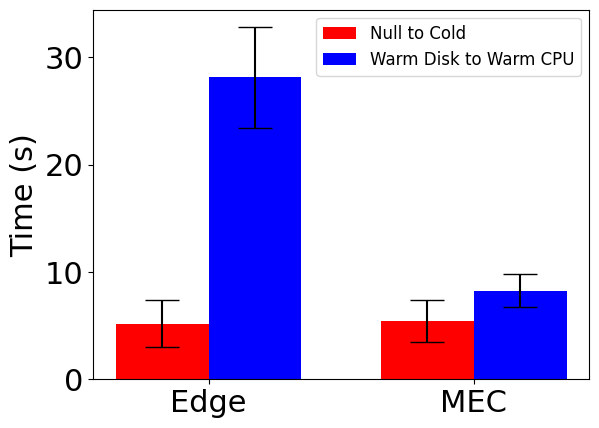

In [41]:
# data
data_null_to_cold = mean_time_null_to_cold
# data_null_to_warm_disk = mean_time_null_to_warm_disk
data_warm_disk_to_warm_cpu = mean_time_warm_disk_to_warm_cpu
# data_warm_cpu_to_active = mean_time_warm_cpu_to_active
# data_cold_to_warm_disk = [x - y - z for x, y, z in zip(data_null_to_warm_disk, data_null_to_cold, data_warm_disk_to_warm_cpu)]

error_null_to_cold = [value*z_value for value in std_time_null_to_cold]
error_null_to_warm_disk = [value*z_value for value in std_time_null_to_warm_disk]
error_warm_disk_to_warm_cpu = [value*z_value for value in std_time_warm_disk_to_warm_cpu]
# error_warm_cpu_to_active = [value*z_value for value in std_time_warm_cpu_to_active]
# print(error_null_to_warm_disk)

location = ['Edge', 'MEC']
tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 12
bar_width = 0.35
x = np.arange(len(location))
x_null_to_cold = x - bar_width/2
x_warm_disk_to_warm_cpu = x + bar_width/2
# plot.plot(pod, data_null_to_cold, color = 'r', label = 'Null to Cold', marker='o' )
# plot.plot(pod, data_cold_to_warm_disk, color = 'c', label = 'Null to Warm Disk', marker='>')
# plot.plot(pod, data_warm_disk_to_warm_cpu, color = 'b', label = 'Warm Disk to Warm CPU',  marker='<')
# plot.plot(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active',  marker='^')

plot.bar(x_null_to_cold, data_null_to_cold, width=bar_width, color = 'r', label = 'Null to Cold', yerr=error_null_to_cold, ecolor='black', capsize=12 )
plot.bar(x_warm_disk_to_warm_cpu, data_warm_disk_to_warm_cpu, width=bar_width, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, ecolor='black', capsize=12)

# plot.errorbar(pod, data_cold_to_warm_disk, color = 'm', label = 'Cold to Warm Disk', yerr=error_null_to_warm_disk, alpha=0.9, ecolor='cyan' )
# plot.errorbar(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active', yerr=error_warm_cpu_to_active, alpha=0.9, ecolor='black', capsize=3)

# Set the y-axis range
# y_min = -5  # Minimum y-axis value
# y_max = 40  # Maximum y-axis value
# plot.ylim(y_min, y_max)
# tick_fontsize = 14
# label_fontsize = 15
# lg_fontsize = 12
plot.ylabel('Time (s)', fontsize = label_fontsize)
# plot.xlabel("Location", fontsize = label_fontsize)
plot.xticks(x, location)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.yscale('log', base = 2)
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-1a.pdf', bbox_inches='tight')

plot.show()

In [42]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval


average_time_null_to_warm_disk = [] 
mean_time_null_to_warm_disk = []
std_time_null_to_warm_disk = []

for j in range(1, 10):
    file_name = "../../Measurements/Lifecycle/4G/timestamp/jetson/warm/time_arm_pod_1_rep_"+str(j)+"_782023_16h39.csv"
    #PROCESS
    time_null_to_warm_disk = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == "cold_to_warm_disk":
                time_null_to_warm_disk.append(float(row[1]))
        average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
mean_time_null_to_warm_disk.append(np.mean(average_time_null_to_warm_disk))
std_time_null_to_warm_disk.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))



average_time_null_to_warm_disk = [] 

for i in range(1,2):
    average_time = [] 
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/4G/timestamp/mec/warm/time_x86_pod_"+str(i)+"_rep_"+str(j)+"_*")
        if len(file_name) == 0:
            continue
        file_name = file_name[0]
        time_null_to_warm_disk = []
        with open(file_name, newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for row in spamreader:
                if row[2] == "cold_to_warm_disk":
                    time_null_to_warm_disk.append(float(row[1]))
        average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
    mean_time_null_to_warm_disk.append(np.mean(average_time_null_to_warm_disk))
    std_time_null_to_warm_disk.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))
print(mean_time_null_to_warm_disk)



[431.9240096675025, 83.45328660011292]


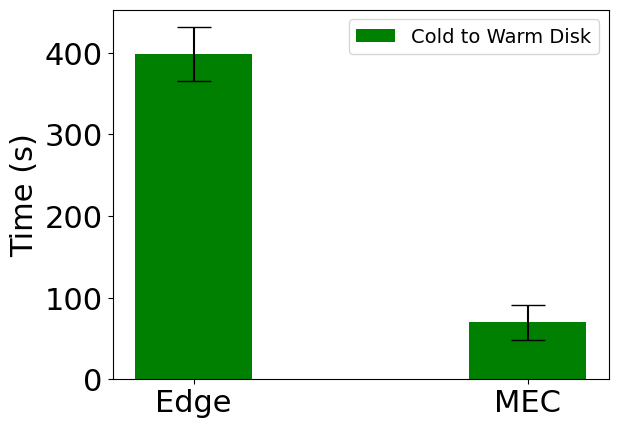

In [43]:
data_null_to_warm_disk = mean_time_null_to_warm_disk
data_cold_to_warm_disk = [x - y - z for x, y, z in zip(data_null_to_warm_disk, data_null_to_cold, data_warm_disk_to_warm_cpu)]

error_null_to_warm_disk = [value*z_value for value in std_time_null_to_warm_disk]

location = ['Edge', 'MEC']
bar_width = 0.35
# x = np.arange(len(location))
# x_null_to_cold = x - bar_width/2
# x_warm_disk_to_warm_cpu = x + bar_width/2


plot.bar(location, data_cold_to_warm_disk, width=bar_width, color = 'green', label = 'Cold to Warm Disk', yerr=error_null_to_warm_disk, ecolor='black', capsize=12 )
# plot.bar(x_warm_disk_to_warm_cpu, data_warm_disk_to_warm_cpu, width=bar_width, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, ecolor='black', capsize=3)

# plot.errorbar(pod, data_cold_to_warm_disk, color = 'm', label = 'Cold to Warm Disk', yerr=error_null_to_warm_disk, alpha=0.9, ecolor='cyan' )
# plot.errorbar(pod, data_warm_cpu_to_active, color = 'g', label = 'Warm CPU to Active', yerr=error_warm_cpu_to_active, alpha=0.9, ecolor='black', capsize=3)

# Set the y-axis range
# y_min = -5  # Minimum y-axis value
# y_max = 40  # Maximum y-axis value
# plot.ylim(y_min, y_max)
tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 14
plot.ylabel('Time (s)', fontsize = label_fontsize)
# plot.xlabel("Location", fontsize = label_fontsize)
plot.xticks(x, location)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-1b.pdf', bbox_inches='tight')

plot.show()

In [44]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.95

z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval
mean_time_warm_cpu_to_active = [] 
std_time_warm_cpu_to_active = [] 


In [45]:
average_time_warm_disk_to_active = []
for j in range(1, 2):
    file_name = "../../Measurements/Curl/4G/jetson/arm_pod_1_rep_1_29_7_2023_11h28.csv"
    #PROCESS
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6])/2)
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
mean_time_warm_cpu_to_active.append(np.mean(average_time_warm_disk_to_active))
std_time_warm_cpu_to_active.append(np.std(average_time_warm_disk_to_active)/np.sqrt(len(average_time_warm_disk_to_active)))


# print(mean_time_4G)

average_time_warm_disk_to_active = []
for i in range(1,2):
    average_time = [] 
    file_name = "../../Measurements/Curl/4G/mec/x86_pod_"+str(i)+"_rep_1_27_7_2023_17h29.csv"
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6])/2)
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
    mean_time_warm_cpu_to_active.append(np.mean(time_warm_disk_to_active))
    std_time_warm_cpu_to_active.append(np.std(time_warm_disk_to_active)/np.sqrt(len(time_warm_disk_to_active)))

# print(mean_time_4G)

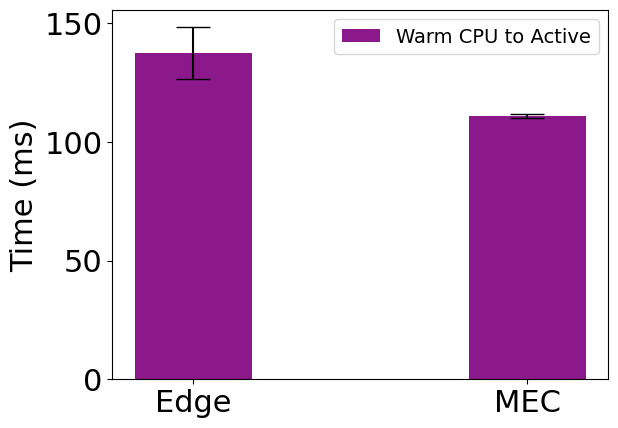

In [46]:
# data
data_time_4G = [value*z_value*1000 for value in mean_time_warm_cpu_to_active]

# print(data_time_3G)
# print(data_time_4G)
# print(data_time_wifi)

error_time_4G = [value*z_value*1000 for value in std_time_warm_cpu_to_active]


# print(error_time_3G)
# print(error_time_4G)
# print(error_time_wifi)
location = ['Edge', 'MEC']
bar_width = 0.35

# plot.errorbar(pod, data_time_3G, color = 'r', label = '3G', yerr=error_time_3G, alpha=0.9, marker='o', ecolor='black', capsize=3 )
plot.bar(location, data_time_4G, width=bar_width, color = 'purple', label = 'Warm CPU to Active', yerr=error_time_4G, alpha=0.9,  ecolor='black', capsize=12 )
# plot.errorbar(pod, data_time_wifi, color = 'b', label = 'wifi', yerr=error_time_wifi, alpha=0.9,  marker='o', ecolor='black', capsize=3 )

# plot.plot(pod, data_time_3G, color = 'r', label = '3G' )
# plot.plot(pod, data_time_4G, color = 'g', label = '4G')
# plot.plot(pod, data_time_wifi, color = 'b', label = 'wifi')
tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 14
plot.ylabel('Time (ms)', fontsize = label_fontsize)
# plot.xlabel("Location", fontsize = label_fontsize)
plot.xticks(x, location)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)
# plot.savefig('/home/core/datn/pdf/warm_cpu_to_active.png', bbox_inches='tight')
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-1c.pdf', bbox_inches='tight')

plot.show()
